# Hackathon Santander Data Challenge

Os impactos da pandemia COVID-19 não possuem precedentes. Tanto por sua característica de isolamento em escala global quanto pela forma de impacto econômico causado pelas medidas de prevenção e enfrentamento. 

O isolamento e distanciamento social, encaminhamento uníssono entre especialistas para prevenção da doença, fez com que a economia local sofresse severos impactos em sua capacidade de atendimento e, portanto, em seu rendimento e viabilidade financeira. 

Por outro lado, de forma paradigmática, no momento da pandemia inúmeros novos investidores surgiram na bolsa de valores, demonstrando que há a capacidade monetária de investimento bem como o interesse dos eventuais investidores. 

Pensando em como ajudar esses micro e pequenos empresários a recuperar sua capacidade de crédito, bem como engajar investidores a aplicar em negócios locais, o time optou por analisar: **é possível atrair investidores para os negócios locais impactados pela pandemia?**

Link para o dashboard: https://drive.google.com/file/d/1RhWmlxBNp2DYhgSaoyo3iHOD2jZ7WQaD/view?usp=sharing 

## 1 - Análise Exploratória e ETL

Intuindo verificar se os pressupostos iniciais eram válidos decidiu-se observar os dados do comportamento das empresas e mercados para compreender se a dinâmica relatada acima (*descendente de notícias veiculadas, como [essa](https://valorinveste.globo.com/mercados/renda-variavel/noticia/2020/05/06/numero-de-investidores-pessoa-fisica-na-bolsa-sobe-a-238-milhoes-em-abril.ghtml)*) eram refletidas pelos dados oficiais. 

Para tanto, adotou-se como fonte primária de dados a Receita Federal do Brasil, a Secretaria de Trabalho do Ministério da Justiça, os dados do Banco Central e dados do SEBRAE. A lista completa com os *datasets* públicos, sua fonte, link para a fonte e observações pode ser vista [aqui](https://drive.google.com/open?id=1PFjRifiM9XqaUTVPAbujhUGZS1Ye9bD2).

**Os dados referentes aos CNPJ brasileiros bem como aqueles referentes ao CAGED, que demonstra o desemprego, detalhados na lista de dados utilizados acima, são grandes, com formatos variados através dos tempos, desagregados em vários arquivos independentes e com um tamanho que excedia várias vezes os limites gratuitos da plataforma da *IBM* (os arquivos somavam cerca de 100Gb em seu estado pré-tratamento e o limite da *IBM* é 25Gb). Assim, após conversa com o @Pelli#4449 via Discord no plantão do sábado a noite, a fusão, tratamento dos diferentes *layouts* de arquivos e filtragem básica foram feitas de forma local, utilizando o Alteryx. Os resultados, arquivos brutos e *scripts* do Alteryx podem ser encontrados [neste link](https://drive.google.com/drive/folders/1GHvoiGW2zURs-nn1Ih2CfwhhSZxMlvUp?usp=sharing) e serão mantidos ali até o dia 10/08/2020, quando serão removidos devido ao seu grande tamanho.**

In [1]:
# The code was removed by Watson Studio for sharing.

,cnpj,cd_secao_cnae,cnae,capital_social_empresa,porte_empresa,situacao,abertura,ativa,codigo_ibge,municipio,uf,cep
0,149757000303,A,111301,0.0,5,2004-02-10,1989-09-01,0,1100205,PORTO VELHO,RO,78905770.0
1,5915400000140,A,111301,0.0,5,2015-02-09,1986-03-10,0,1100205,PORTO VELHO,RO,78902900.0
2,15850654000181,A,111301,0.0,5,2008-12-31,1987-02-26,0,1100205,PORTO VELHO,RO,78902900.0
3,15895741000155,A,111301,0.0,5,2018-12-05,1987-10-01,1,1100205,PORTO VELHO,RO,78916260.0
4,14611693000163,A,111301,0.0,1,2006-11-07,1986-10-08,0,1100122,JI-PARANA,RO,78964460.0


In [2]:
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 200

### Funções Básicas para Análise

In [3]:
def tabela_categoricas(df,col,name_col):
    df_1 = pd.DataFrame(df[col].value_counts()).reset_index()
    df_1.columns = [name_col,'Qtd empresas']
    df_1['%Total'] = (df_1['Qtd empresas']/len(df))*100
    return df_1

In [4]:
def distribuicaoNumericas(df,col,nameCol):
    med = pd.DataFrame(columns=[nameCol], index=['Media', 'Mediana', 'Minimo','Maximo'])
    med.loc['Media'][nameCol] = float(df[col].mean())
    med.loc['Mediana'][nameCol] = float(df[col].median())
    med.loc['Minimo'][nameCol] = float(df[col].min())
    med.loc['Maximo'][nameCol] = float(df[col].max())
    return med

### Carregamento das Bases

In [5]:
body = client_080a4da00a8042249dc97b58c9b4df61.get_object(Bucket='sdc-donotdelete-pr-y5i3rwpnhgwml9',Key='descricao_cnae.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_desc_cnae = pd.read_csv(body, encoding='latin1')
df_desc_cnae.head()

,cd_secao_cnae,descr_secao_cnae
0,A,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA"
1,B,INDÚSTRIAS EXTRATIVAS
2,C,INDÚSTRIAS DE TRANSFORMAÇÃO
3,D,ELETRICIDADE E GÁS
4,E,"ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS E DESCONTAMINAÇÃO"


In [6]:
body = client_080a4da00a8042249dc97b58c9b4df61.get_object(Bucket='sdc-donotdelete-pr-y5i3rwpnhgwml9',Key='uf_regiao.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_uf_regiao = pd.read_csv(body)
df_uf_regiao.head()

,uf,regiao
0,AM,Norte
1,RR,Norte
2,AP,Norte
3,PA,Norte
4,TO,Norte


In [5]:
df_cnpjs = df_CNPJ.copy()
df_cnpjs.shape

(42521762, 12)

In [6]:
# Descrição do Porte da Empresa
df_cnpjs['porte_empresa_descr']= df_cnpjs['porte_empresa'].replace([0,1,3,5],['NAO INFORMADO','MICRO EMPRESA','EMPRESA DE PEQUENO PORTE','DEMAIS'])
df_cnpjs['situacao_atividade']= df_cnpjs['ativa'].replace([0,1],['INATIVA','ATIVA'])

In [7]:
# Join para incluir descrição do CNAE
df_cnpjs = pd.merge(df_cnpjs, df_desc_cnae,how='left', on=['cd_secao_cnae'])
df_cnpjs = pd.merge(df_cnpjs, df_uf_regiao,how='left', on=['uf'])

In [8]:
df_cnpjs = df_cnpjs.dropna(subset=['situacao','abertura'])

In [9]:
#Verificação de Valores Ausentes
df_cnpjs.isnull().sum()

cnpj                       0
cd_secao_cnae              0
cnae                       0
capital_social_empresa     0
porte_empresa              0
situacao                   0
abertura                   0
ativa                      0
codigo_ibge                0
municipio                  0
uf                         0
cep                       11
porte_empresa_descr        0
situacao_atividade         0
descr_secao_cnae           0
regiao                     0
dtype: int64

In [10]:
# Extraindo informação do ano de abertura e situação, e tratando valores ausentes desse campo
df_cnpjs['ano_abertura'] = df_cnpjs['abertura'].str[:4].astype(int)
df_cnpjs['ano_situacao'] = df_cnpjs['situacao'].str[:4].astype(int)

#### Porte da Empresa

In [11]:
tabela_categoricas(df_cnpjs,'porte_empresa_descr','Porte')

,Porte,Qtd empresas,%Total
0,MICRO EMPRESA,28785204,67.70
1,DEMAIS,12444289,29.27
2,EMPRESA DE PEQUENO PORTE,1292239,3.04
3,NAO INFORMADO,12,0.00


#### Distribuição por CNAE

In [12]:
tabela_categoricas(df_cnpjs,'descr_secao_cnae','CNAE')

,CNAE,Qtd empresas,%Total
0,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,15699182,36.92
1,OUTRAS ATIVIDADES DE SERVIÇOS,5737982,13.49
2,ALOJAMENTO E ALIMENTAÇÃO,3777456,8.88
3,INDÚSTRIAS DE TRANSFORMAÇÃO,3479977,8.18
4,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,2451340,5.76
5,CONSTRUÇÃO,2374291,5.58
6,"TRANSPORTE, ARMAZENAGEM E CORREIO",1913975,4.50
7,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",1882227,4.43
8,EDUCAÇÃO,999409,2.35
9,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",950471,2.24


#### Capital Social

<AxesSubplot:>

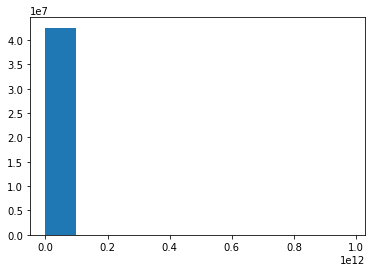

In [13]:
df_cnpjs['capital_social_empresa'].hist(grid = False)

In [14]:
distribuicaoNumericas(df_cnpjs,'capital_social_empresa','Capital Social - Empresas')

,Capital Social - Empresas
Media,"970,532.55"
Mediana,350.00
Minimo,0.00
Maximo,"979,787,731,300.00"


Nesse ponto observa-se uma grande tendência para valores que se aproximam de zero no capital social, para utilizar esse dado no modelo posteriormente, vale a pena verificar melhor esse dado. 

In [15]:
df_cnpjs[df_cnpjs['capital_social_empresa']==0].shape[0]

16901942

In [16]:
df_cnpjs[df_cnpjs['capital_social_empresa']>0].shape[0]

25619802

In [17]:
# Empresa com maior capital social declarado
df_cnpjs[df_cnpjs['capital_social_empresa']>979787731200]

,cnpj,cd_secao_cnae,cnae,capital_social_empresa,porte_empresa,situacao,abertura,ativa,codigo_ibge,municipio,uf,cep,porte_empresa_descr,situacao_atividade,descr_secao_cnae,regiao,ano_abertura,ano_situacao
42297092,19853740000107,S,9609299,"979,787,731,300.00",5,2014-02-24,2014-02-24,1,3304557,RIO DE JANEIRO,RJ,"23,082,180.00",DEMAIS,ATIVA,OUTRAS ATIVIDADES DE SERVIÇOS,Sudeste,2014,2014


#### Análise de Empresas Ativas e Inativas e do tempo de vida das empresas

In [18]:
ativas = df_cnpjs[df_cnpjs['ativa']==1]
inativas = df_cnpjs[df_cnpjs['ativa']==0]

In [19]:
tabela_categoricas(df_cnpjs,'situacao_atividade','Situação')

,Situação,Qtd empresas,%Total
0,ATIVA,24563700,57.77
1,INATIVA,17958044,42.23


In [20]:
ativas['tempo'] = 2020 - ativas['ano_abertura']

/home/baroni/anaconda3/envs/SantanderDatathon/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
distribuicaoNumericas(ativas,'tempo','Tempo Empresas Ativas')

,Tempo Empresas Ativas
Media,9.71
Mediana,6.00
Minimo,0.00
Maximo,419.00


In [22]:
ativas = ativas[ativas['tempo']<200]

<AxesSubplot:>

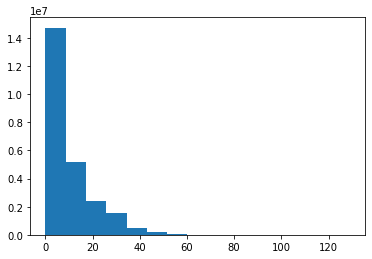

In [23]:
ativas['tempo'].hist(grid = False, bins = 15)

In [24]:
inativas['tempo'] = inativas['ano_situacao'] - inativas['ano_abertura']

/home/baroni/anaconda3/envs/SantanderDatathon/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
distribuicaoNumericas(inativas,'tempo','Tempo Empresas Inativas')

,Tempo Empresas Inativas
Media,8.39
Mediana,5.00
Minimo,-14.00
Maximo,308.00


In [26]:
inativas = inativas[inativas['tempo']<200]

<AxesSubplot:>

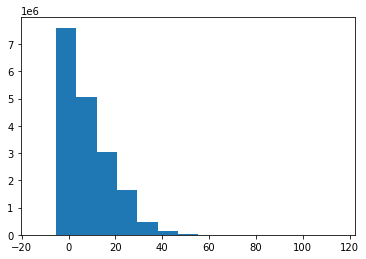

In [27]:
inativas['tempo'].hist(grid = False, bins = 15)

Verificar, entre o tempo de vida das empresas inativas, se houve uma aceleração de fechamentos no momento da pandemia (*fechamentos precoces*)

In [32]:
inativas = inativas[inativas['ano_situacao'] == 2020]

<AxesSubplot:>

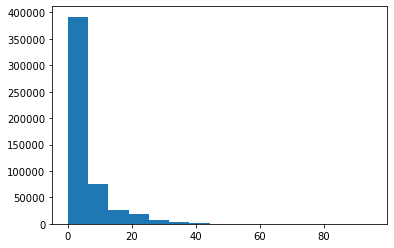

In [33]:
inativas['tempo'].hist(grid = False, bins = 15)

Fica claro que empresas mais jovens foram mais atingidas pela crise causada pela pandemia, provavelmente graças a não terem uma situação financeira consolidada. Dessa forma, é necessário observar o comportamento da abertura de empresas no ano anterior.

#### Abertura de Empresas

In [28]:
bases = [ativas,inativas]
df_cnpjs = pd.concat(bases)

In [29]:
abert_anos = pd.DataFrame(df_cnpjs['ano_abertura'].value_counts()).reset_index()
abert_anos = abert_anos[abert_anos['index']>2000]
abert_anos.columns = ['Ano Abertura','Qtd Empresas']
abert_anos['Ano Abertura'] = abert_anos['Ano Abertura'].apply(str)
abert_anos = abert_anos.sort_values(by='Ano Abertura')

Text(0.5, 0, 'Ano Abertura')

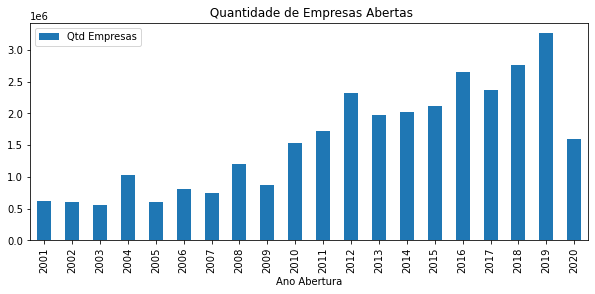

In [30]:
ax = abert_anos.plot(kind = "bar", x = 'Ano Abertura',title = " Quantidade de Empresas Abertas",figsize = (10,4))
ax.set_xlabel("Ano Abertura")

In [31]:
df_cnpjs_ult_ano = df_cnpjs[df_cnpjs['ano_abertura']>2018]

In [32]:
tabela_categoricas(df_cnpjs_ult_ano,'descr_secao_cnae','CNAE')

,CNAE,Qtd empresas,%Total
0,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,1290010,26.59
1,ALOJAMENTO E ALIMENTAÇÃO,517287,10.66
2,OUTRAS ATIVIDADES DE SERVIÇOS,472286,9.74
3,INDÚSTRIAS DE TRANSFORMAÇÃO,415828,8.57
4,"TRANSPORTE, ARMAZENAGEM E CORREIO",413174,8.52
5,CONSTRUÇÃO,387732,7.99
6,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",327970,6.76
7,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,314958,6.49
8,EDUCAÇÃO,191455,3.95
9,SAÚDE HUMANA E SERVIÇOS SOCIAIS,129077,2.66


#### Fechamento de Empresas

In [33]:
fech_anos = pd.DataFrame(inativas['ano_situacao'].value_counts()).reset_index()
fech_anos = fech_anos[fech_anos['index']>2000]
fech_anos.columns = ['Ano Fechamento','Qtd Empresas']
fech_anos['Ano Fechamento'] = fech_anos['Ano Fechamento'].apply(str)
fech_anos = fech_anos.sort_values(by='Ano Fechamento')

Text(0.5, 0, 'Ano Fechamento')

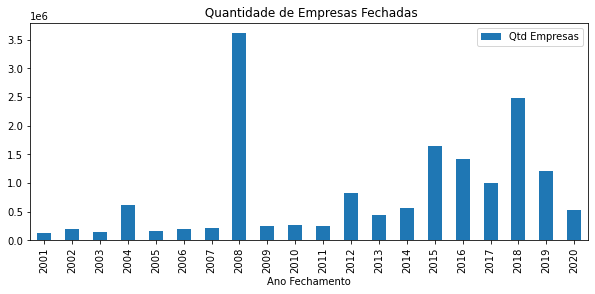

In [34]:
ax = fech_anos.plot(kind = "bar", x = 'Ano Fechamento',title = " Quantidade de Empresas Fechadas",figsize = (10,4))
ax.set_xlabel("Ano Fechamento")

### Regiões Geográficas

In [35]:
regiao = pd.DataFrame(df_cnpjs['regiao'].value_counts()).reset_index()
regiao.columns = ['Regiao','Qtd Empresas']
regiao['Regiao'] = regiao['Regiao'].apply(str)
regiao = regiao.sort_values(by='Regiao')

Text(0.5, 0, 'Regiao')

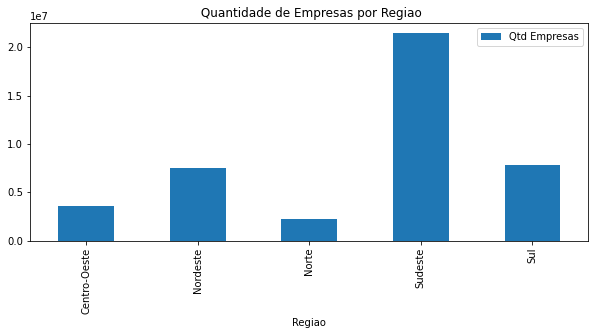

In [36]:
ax = regiao.plot(kind = "bar", x = 'Regiao',title = " Quantidade de Empresas por Regiao",figsize = (10,4))
ax.set_xlabel("Regiao")

#### Análise da Relação UF *versus* Tempo de Vida 

In [37]:
estados = pd.DataFrame(df_cnpjs['uf'].value_counts()).reset_index()
estados.columns = ['Estados','Qtd Empresas']
estados = estados.sort_values(by='Estados')

Text(0.5, 0, 'Estados')

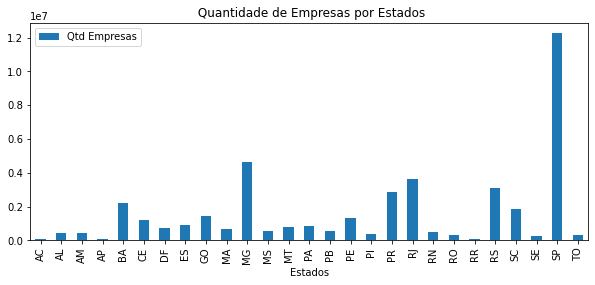

In [38]:
ax = estados.plot(kind = "bar", x = 'Estados',title = " Quantidade de Empresas por Estados",figsize = (10,4))
ax.set_xlabel("Estados")

In [39]:
estados

,Estados,Qtd Empresas
24,AC,104505
19,AL,415456
18,AM,442875
25,AP,100994
5,BA,2208913
9,CE,1231001
13,DF,725252
10,ES,886451
7,GO,1464956
14,MA,669694


In [40]:
estados = df_cnpjs[['uf','tempo']].drop_duplicates()
maior_tempo = estados.groupby(['uf']).max()
maior_tempo = maior_tempo.reset_index()
maior_tempo.columns = ['Estado (UF)','Tempo de Vida da Empresa(Max)']
maior_tempo.sort_values(by ='Tempo de Vida da Empresa(Max)', ascending = False ).head(10)

,Estado (UF),Tempo de Vida da Empresa(Max)
10,MG,129
25,SP,121
13,PA,119
23,SC,119
22,RS,119
18,RJ,119
17,PR,119
15,PE,119
1,AL,119
26,TO,119


In [41]:
maior_tempo = estados.groupby(['uf']).mean()
maior_tempo = maior_tempo.reset_index()
maior_tempo.columns = ['Estado (UF)','Tempo de Vida da Empresa (Media)']
maior_tempo.sort_values(by ='Tempo de Vida da Empresa (Media)', ascending = False ).head(10)

,Estado (UF),Tempo de Vida da Empresa (Media)
15,PE,53.93
25,SP,49.36
10,MG,48.09
22,RS,47.82
4,BA,46.24
13,PA,44.48
5,CE,44.02
18,RJ,43.71
23,SC,42.68
17,PR,42.44


In [42]:
maior_tempo.sort_values(by ='Tempo de Vida da Empresa (Media)', ascending = True).head(10)

,Estado (UF),Tempo de Vida da Empresa (Media)
3,AP,26.98
21,RR,27.00
0,AC,28.00
11,MS,28.44
20,RO,28.63
16,PI,29.68
6,DF,29.97
12,MT,31.75
2,AM,34.53
9,MA,34.61


#### Estados que Mais Fecharam Empresas

In [43]:
uf_fech = pd.DataFrame(inativas['uf'].value_counts()).reset_index()
uf_fech.columns = ['Estados','Qtd Empresas Fechadas']
uf_fech = uf_fech.sort_values(by='Estados')

Text(0.5, 0, 'Estados')

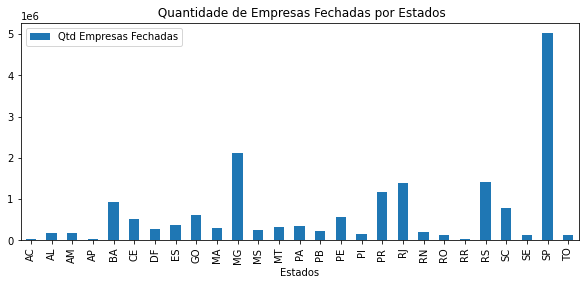

In [44]:
ax = uf_fech.plot(kind = "bar", x = 'Estados',title = " Quantidade de Empresas Fechadas por Estados",figsize = (10,4))
ax.set_xlabel("Estados")

In [45]:
uf_fech

,Estados,Qtd Empresas Fechadas
24,AC,45224
18,AL,189098
19,AM,187521
25,AP,43148
5,BA,937493
9,CE,509192
14,DF,280319
10,ES,363493
7,GO,618078
13,MA,295510


# Análise Exploratória do Perfil dos Investidores Individuais

In [57]:
import sys
!conda install --yes --prefix {sys.prefix} plotly
!pip install plotly --upgrade
!conda install --yes --prefix {sys.prefix} xlrd
!conda install --yes  --prefix {sys.prefix} psutil

Solving environment: done

# All requested packages already installed.

Requirement already up-to-date: plotly in /home/baroni/anaconda3/envs/SantanderDatathon/lib/python3.6/site-packages (4.9.0)
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [ ]:
import types
from botocore.client import Config
import ibm_boto3
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go 
import plotly.express as px
from plotly.subplots import make_subplots

py.init_notebook_mode(connected=True)

In [ ]:
# The code was removed by Watson Studio for sharing.

In [58]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go 
import plotly.express as px
from plotly.subplots import make_subplots

#pd.options.display. = '{:,.2f}'.format

py.init_notebook_mode(connected=True)

columns = ['classe_investidor', 'valor_vista', 'percent_vista', 'valor_termo', 'percent_termo', 'valor_opcoes', 'percent_opcoes', 'valor_exercicio_opcoes', 'percent_exercicio_opcoes', 'R$ Total geral', 'percent_total_geral']
participacao_investidores = pd.read_excel("Dados/investidores.xlsx", header=0)

In [59]:
participacao_investidores

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,nan,NaN,Participação dos Investidores na B3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nan,NaN,Total (Compras + Vendas) - Junho/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nan,Classe Investidor,Vista,NaN,Termo,NaN,Opções,NaN,Exercício de Opções,NaN,Total geral,NaN
4,nan,NaN,R$,Part. (%),R$,Part. (%),R$,Part. (%),R$,Part. (%),R$,Part. (%)
5,nan,Investidores Individuais,316223285206,0.25,2120639349,0.23,6379160634,0.20,2376880572,0.04,327099965760,0.24
6,nan,Clubes de Investimento,2243986464,0.00,107039040,0.01,41430867,0.00,26659252,0.00,2419115623,0.00
7,nan,Institucionais,286065845577,0.23,5131423241,0.55,10004179084,0.32,28417290354,0.47,329618738256,0.24
8,nan,Investidores Estrangeiros,596375112280,0.47,53228510,0.01,13827905597,0.44,26738174044,0.44,636994420431,0.47
9,nan,Empresas Públicas e Privadas,9543689950,0.01,165633629,0.02,138748122,0.00,87750392,0.00,9935822093,0.01


In [60]:
participacao_investidores = participacao_investidores.iloc[5:,]
participacao_investidores.drop(participacao_investidores.columns[0], axis=1, inplace=True)
participacao_investidores = participacao_investidores.reset_index(drop=True)
participacao_investidores.columns = columns
participacao_investidores

/home/baroni/anaconda3/envs/SantanderDatathon/lib/python3.6/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,classe_investidor,valor_vista,percent_vista,valor_termo,percent_termo,valor_opcoes,percent_opcoes,valor_exercicio_opcoes,percent_exercicio_opcoes,R$ Total geral,percent_total_geral
0,Investidores Individuais,316223285206,0.25,2120639349,0.23,6379160634,0.20,2376880572,0.04,327099965760,0.24
1,Clubes de Investimento,2243986464,0.00,107039040,0.01,41430867,0.00,26659252,0.00,2419115623,0.00
2,Institucionais,286065845577,0.23,5131423241,0.55,10004179084,0.32,28417290354,0.47,329618738256,0.24
3,Investidores Estrangeiros,596375112280,0.47,53228510,0.01,13827905597,0.44,26738174044,0.44,636994420431,0.47
4,Empresas Públicas e Privadas,9543689950,0.01,165633629,0.02,138748122,0.00,87750392,0.00,9935822093,0.01
5,Instituições Financeiras,51925429203,0.04,1804807985,0.19,789506932,0.03,3418823119,0.06,57938567239,0.04
6,Outros,195090592,0.00,0,0,0,0,0,0,195090592,0.00


In [61]:
valores_investimentos = pd.DataFrame(columns=['tipo_investidor','tipo_operacao', 'valor','percent'])

j = 0
for investimento, idx in zip(participacao_investidores.values,range(participacao_investidores.shape[0])):
    for i, operacao in zip(range(0,len(investimento)-1,2),['vista','termo','opcoes','exercicio_opcoes','total']):
        pos = idx+j
        valores_investimentos.at[pos,'tipo_investidor'] = investimento[0]
        valores_investimentos.at[pos,'tipo_operacao'] = operacao
        valores_investimentos.at[pos,'valor'] = investimento[i+1]
        valores_investimentos.at[pos,'percent'] = investimento[i+2]
        j += 1

valores_investimentos.head(3)

,tipo_investidor,tipo_operacao,valor,percent
0,Investidores Individuais,vista,316223285206,0.25
1,Investidores Individuais,termo,2120639349,0.23
2,Investidores Individuais,opcoes,6379160634,0.20


In [66]:
valores_investimentos = valores_investimentos.sort_values('valor', ascending=False)
valor_total = valores_investimentos[valores_investimentos.tipo_operacao == 'total']
fig = px.bar(valor_total, x='tipo_investidor', 
                y='valor', text='valor',
                hover_data=['percent', 'valor'],
                labels={'tipo_investidor':'Investidor'},
                title="Participação dos Investidores na B3: Total (Compras + Vendas) - Junho/2020")

fig.update_layout(plot_bgcolor='white')
fig.update_traces(texttemplate='%{text:.2s}')

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show()

In [68]:
colors = ['lightslategray',] * 7
colors[2] = 'crimson'

# cria eixo secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=valor_total.tipo_investidor, y=valor_total.valor, name="R$", 
                    marker_color=colors),
                    secondary_y=False)

fig.add_trace(go.Scatter(x=valor_total.tipo_investidor, y=valor_total.percent, name='%'),
                    secondary_y=True)

fig.update_layout(title_text="Participação dos Investidores na B3: Total (Compras + Vendas) - Junho/2020",
                    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white')

fig.update_xaxes(title_text="Investidor")
fig.update_yaxes(title_text="<b>R$ Total Investido</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b>", secondary_y=True, tickformat = ".0%")
fig.update_traces()
#fig.update_traces(texttemplate='%{text:.2s}')

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show()

In [72]:
perfil_investidor_evolucao = pd.read_excel("Dados/perfil_investidores_jun2020.xlsx", 'Evolução Pessoa Física', skiprows=4)
perfil_investidor_evolucao = perfil_investidor_evolucao.iloc[:-8]
perfil_investidor_evolucao.drop(perfil_investidor_evolucao.columns[0], axis=1, inplace=True)
perfil_investidor_evolucao = perfil_investidor_evolucao.reset_index(drop=True)
perfil_investidor_evolucao.head(3)

,Unnamed: 1,Qtd,%,Qtd.1,%.1,Qtd.2
0,2002,"70,219.00",0.82,"15,030.00",0.18,"85,249.00"
1,2003,"69,753.00",0.82,"15,725.00",0.18,"85,478.00"
2,2004,"94,434.00",0.81,"22,480.00",0.19,"116,914.00"


In [73]:
perfil_investidores = pd.DataFrame(columns=['ano','qtd','percent','genero'])

j = 0
for perfil, idx in zip(perfil_investidor_evolucao.values,range(perfil_investidor_evolucao.shape[0])):
    for i, genero in zip(range(0,len(perfil)-1,2),['homem','mulher']):
        pos = idx+j
        perfil_investidores.at[pos,'ano'] = perfil[0]
        perfil_investidores.at[pos,'qtd'] = perfil[i+1]
        perfil_investidores.at[pos,'percent'] = perfil[i+2]
        perfil_investidores.at[pos,'genero'] = genero
        j += 1

perfil_investidores.head(5)

,ano,qtd,percent,genero
0,2002,"70,219.00",0.82,homem
1,2002,"15,030.00",0.18,mulher
3,2003,"69,753.00",0.82,homem
4,2003,"15,725.00",0.18,mulher
6,2004,"94,434.00",0.81,homem


In [74]:
fig = px.line(perfil_investidores, x='ano', y='qtd',color='genero')
fig.update_layout(title_text="Distribuição da participação de homens e mulheres no total de investidores",
                    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white')
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="<b>Quantidade de Investidores</b>")

#fig.update_traces(texttemplate='%{text:.2s}')

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show()

In [76]:
perfil_investidor_raw = pd.read_excel("Dados/perfil_investidores_jun2020.xlsx", 'Detalhe Pessoa Física')

#perfil_investidor_raw.head(8)

In [77]:
perfil_investidor_region = perfil_investidor_raw.loc[7:,'Unnamed: 10':]
colunas_total_region = ['uf', 'qtd_contas', 'valor','percent']

perfil_investidor_region_total = pd.DataFrame(perfil_investidor_raw.loc[7:,'Unnamed: 10':],columns=['Unnamed: 10','Unnamed: 13','Unnamed: 16','Unnamed: 17'])
perfil_investidor_region_total.columns = colunas_total_region
perfil_investidor_region_total = perfil_investidor_region_total.iloc[:-1]
perfil_investidor_region_total.head(5)

,uf,qtd_contas,valor,percent
7,SP,1031039,170.54,0.49
8,RJ,290798,53.51,0.15
9,MG,254918,35.21,0.10
10,RS,147362,18.66,0.05
11,SC,124425,11.90,0.03


In [78]:
perfil_investidor_region_total = perfil_investidor_region_total.sort_values('valor', ascending=False)

# cria eixo secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=perfil_investidor_region_total.uf, y=perfil_investidor_region_total.valor, name="R$"),
                secondary_y=False)

fig.add_trace(go.Scatter(x=perfil_investidor_region_total.uf, y=perfil_investidor_region_total.percent, name="%"),
                secondary_y=True)

fig.update_layout(title_text="Quadro de Investimentos Pessoa Física por Estado",
                    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white')

fig.update_xaxes(title_text="UF")
fig.update_yaxes(title_text="<b>Investimento (R$ bilhões)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b>", secondary_y=True, tickformat = ".1%")

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show()

In [81]:
perfil_investidor_region_genero = pd.DataFrame(perfil_investidor_raw.loc[7:,'Unnamed: 10':],columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 14','Unnamed: 15'])
perfil_genero = pd.DataFrame(columns=['uf','qtd_contas', 'valor', 'genero'])

j = 0
for perfil, idx in zip(perfil_investidor_region_genero.values,range(perfil_investidor_region_genero.shape[0])):
    for i, genero in zip(range(0,len(perfil)-1,2),['homem','mulher']):
        pos = idx+j
        perfil_genero.at[pos,'uf'] = perfil[0]
        perfil_genero.at[pos,'qtd_contas'] = perfil[i+1]
        perfil_genero.at[pos,'valor'] = perfil[i+2]
        perfil_genero.at[pos,'genero'] = genero
        j += 1

perfil_genero = perfil_genero.iloc[:-2]
perfil_genero.head(4)

,uf,qtd_contas,valor,genero
0,SP,767395,263644,homem
1,SP,131.85,38.69,mulher
3,RJ,215356,75442,homem
4,RJ,39.92,13.59,mulher


In [82]:
fig = px.bar(perfil_genero, x='uf', y='qtd_contas', color='genero', text = 'qtd_contas')

fig.update_layout(title_text="Quadro de Investimentos por Estado e Gênero",
                    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white')

fig.update_traces(texttemplate='%{text:.2s}')

fig.show('svg')

In [84]:
homem = perfil_genero.genero == 'homem'
mulher = perfil_genero.genero == 'mulher'

fig1 = go.Figure(data=[
    go.Bar(name='Valor (R$ bilhões)', x=perfil_genero[homem].uf, y=perfil_genero[homem].valor),
    go.Bar(name='Qtd Contas', x=perfil_genero[homem].uf, y=perfil_genero[homem].qtd_contas)
])

fig1.update_layout(barmode='group', xaxis_showgrid=False, yaxis_showgrid=False,
                    title = 'Quadro de Investimentos de Homens por Estado',
                    plot_bgcolor='white')
#fig1.show()
#imagem estática para post no git
fig1.show('svg')

fig2 = go.Figure(data=[
    go.Bar(name='Valor (R$ bilhões)', x=perfil_genero[homem].uf, y=perfil_genero[mulher].valor),
    go.Bar(name='Qtd Contas', x=perfil_genero[homem].uf, y=perfil_genero[mulher].qtd_contas)
])

fig2.update_layout(barmode='group', xaxis_showgrid=False, yaxis_showgrid=False,
                    title = 'Quadro de Investimentos de Mulheres por Estado',
                    plot_bgcolor='white')
#fig2.show()
#imagem estática para post no git
fig2.show('svg')

In [85]:
perfil_investidor_region = perfil_investidor_raw.loc[7:,'Unnamed: 10':]
colunas_total_region = ['uf', 'qtd_contas', 'valor','percent']

perfil_investidor_region_total = pd.DataFrame(perfil_investidor_raw.loc[7:,'Unnamed: 10':],columns=['Unnamed: 10','Unnamed: 13','Unnamed: 16','Unnamed: 17'])
perfil_investidor_region_total.columns = colunas_total_region
perfil_investidor_region_total = perfil_investidor_region_total.iloc[:-1]
perfil_investidor_region_total.head(5)


,uf,qtd_contas,valor,percent
7,SP,1031039,170.54,0.49
8,RJ,290798,53.51,0.15
9,MG,254918,35.21,0.10
10,RS,147362,18.66,0.05
11,SC,124425,11.90,0.03


In [86]:
perfil_investidor_region_total = perfil_investidor_region_total.sort_values('valor', ascending=False)

# cria eixo secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=perfil_investidor_region_total.uf, y=perfil_investidor_region_total.valor, name="R$"),
                secondary_y=False)

fig.add_trace(go.Scatter(x=perfil_investidor_region_total.uf, y=perfil_investidor_region_total.percent, name="%"),
                secondary_y=True)

fig.update_layout(title_text="Quadro de Investimentos Pessoa Física por Estado",
                    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white')

fig.update_xaxes(title_text="UF")
fig.update_yaxes(title_text="<b>Investimento (R$ bilhões)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b>", secondary_y=True, tickformat = ".1%")

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show()

In [87]:
perfil_genero_total = perfil_investidor_raw.loc[7:8,'Unnamed: 1':'Unnamed: 3']
perfil_genero_total.columns = ['genero','qtd_investidores','percent']
perfil_genero_total.at[7,'genero'] = 'homem'
perfil_genero_total.at[8,'genero'] ='mulher'
perfil_genero_total

,genero,qtd_investidores,percent
7,homem,2000810,0.75
8,mulher,648165,0.24


In [88]:
perfil_faixa_etaria = pd.DataFrame(columns=['faixa','genero','qtd_contas'])

j = 0
for perfil, idx in zip(perfil_investidor_raw.loc[19:25,'Unnamed: 1':'Unnamed: 8'].values,range(7)):
    for i, genero in zip(range(0,len(perfil)-1,2),['homem','mulher']):
        #print(perfil)
        pos = idx+j
        perfil_faixa_etaria.at[pos,'faixa'] = perfil[0]
        perfil_faixa_etaria.at[pos,'qtd_contas'] = perfil[i+1]
        perfil_faixa_etaria.at[pos,'valor'] = perfil[i+2]
        perfil_faixa_etaria.at[pos,'genero'] = genero
        #perfil_faixa_etaria.at[pos,'percent'] = (perfil[i+1]*perfil[-1])/float(perfil[3]) #percentual por gênero
        j += 1

perfil_faixa_etaria.head(3)

,faixa,genero,qtd_contas,valor
0,Até 15 anos,homem,5145,"4,181.00"
1,Até 15 anos,mulher,9326,1.55
3,De 16 a 25 anos,homem,253654,"65,861.00"


In [89]:
homem = perfil_faixa_etaria.genero == 'homem'
mulher = perfil_faixa_etaria.genero == 'mulher'

fig1 = go.Figure(data=[
    go.Bar(name='Valor (R$ bilhões)', x=perfil_faixa_etaria[homem].faixa, y=perfil_faixa_etaria[homem].valor),
    go.Bar(name='Qtd Contas', x=perfil_faixa_etaria[homem].faixa, y=perfil_faixa_etaria[homem].qtd_contas)
])

fig1.update_layout(barmode='group', xaxis_showgrid=False, yaxis_showgrid=False,
                    title = 'Quadro de Investimentos de Homens por Faixa Etária',
                    plot_bgcolor='white')
#fig1.show()
#imagem estática para post no git
fig1.show('svg')

fig2 = go.Figure(data=[
    go.Bar(name='Valor (R$ bilhões)', x=perfil_faixa_etaria[homem].faixa, y=perfil_faixa_etaria[mulher].valor),
    go.Bar(name='Qtd Contas', x=perfil_faixa_etaria[homem].faixa, y=perfil_faixa_etaria[mulher].qtd_contas)
])

fig2.update_layout(barmode='group', xaxis_showgrid=False, yaxis_showgrid=False,
                    title = 'Quadro de Investimentos de Mulheres por Faixa Etária',
                    plot_bgcolor='white')
#fig2.show()
#imagem estática para post no git
fig2.show('svg')

As análises exploratórias anteriores demonstram um agravamento da crise para empresários sobremodo, de forma desproporcional ao que seria esperado em rito normal, corroborando com o topoi inicial. Essa característica de falência precoce de empresas leva a crer que, provavelmente, vários empresários que prosperariam para momentos posteriores, acabaram fechando suas empresas. 

Por outro lado a análise exploratória dos dados de investimento demonstram um aumento do aporte no mercado de capitais de investidores jovens e com menor experiencia. Em geral esse perfil possui uma capacidade de capitalização menor, geralmente optando por investimentos de menor monta e, em geral, mais adepto a correr riscos em busca de retornos rápido e maiores. 

Esse perfil de investidor, clássico na literatura especializada, é bastante aderente ao perfil de investidores que podem, eventualmente, aderir ao financiamento coletivo, captando para si um volume de retorno interessante e ajudando a fomentar o equilíbrio econômico local. 

Destas conclusões, chegamos à uma oportunidade bastante interessante: “ **é possível criar um modelo de predição de comportamento do tomador de empréstimo, permitindo a estruturação de uma de análise de risco**?

# Modelo de Análise de Risco Ajustado ao Cenário da Pandemia

Para o treinamento de um modelo para predição foram sintetizados dados utilizando como base os registros do CNPJ, usando como indicativo de adimplência proporção similar àquela observada pelo Banco Central. Como, para essa finalidade, foi utilizada uma amostra da base total dos CNPJ, fez-se o uso do Alteryx, novamente, estando o arquivo salvo conforme informado anteriormente

In [2]:
!pip install scikit-learn numpy

In [2]:
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import numpy as np
import matplotlib.pyplot as plt
import itertools

In [48]:

body = client_080a4da00a8042249dc97b58c9b4df61.get_object(Bucket='sdc-donotdelete-pr-y5i3rwpnhgwml9',Key='testeModelo2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dsEmp = pd.read_csv(body)
dsEmp.head()


,valor_solicitado,secao,renda_liquida_anual,status,protesto_ultimos_2anos,primeira_operacao_credito,solicitacoes_emprestimo_6meses,valor_devedor,sede_propria_emprestada,sede_propria_financiada,...,motivo_trabalhista,motivo_caixa,motivo_mudanca,motivo_outros,motivo_estrutura,motivo_digitalizacao,motivo_fornecedores,motivo_mudanca_mercao,prazo_36meses,prazo_60meses
0,30000,4,100000.0,1,0.0,2012,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40000,3,45000.0,1,0.0,2009,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,20000,1,100000.0,1,0.0,1999,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4500,2,38500.0,1,0.0,2003,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8425,5,450000.0,1,0.0,1997,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [49]:
#Pego apenas 5% da amostra para ficar mais leve. Recomendo realizar a análise 
#com todo o dataset. 
y = dsEmp['status']

x = dsEmp.loc[:, dsEmp.columns != 'status']

In [50]:
correlacao = x.corrwith(y, method = 'spearman')
print(correlacao)

valor_solicitado                 -0.076479
secao                            -0.262247
renda_liquida_anual               0.067319
protesto_ultimos_2anos           -0.017910
primeira_operacao_credito        -0.055370
solicitacoes_emprestimo_6meses   -0.056585
valor_devedor                    -0.003665
sede_propria_emprestada          -0.000395
sede_propria_financiada           0.074796
sede_propria_nao                  0.001021
sede_propria_outros              -0.000314
sede_propria                     -0.003695
sede_propria_alugada             -0.074624
motivo_dividas                    0.012920
motivo_estoque                    0.041727
motivo_pessoal                   -0.034236
motivo_estoque_outros             0.000510
motivo_reforma                    0.015160
motivo_compra_equipamentos       -0.003359
motivo_trabalhista                0.001965
motivo_caixa                     -0.004282
motivo_mudanca                   -0.008176
motivo_outros                    -0.007837
motivo_estr

In [51]:
drop_list = ['motivo_estoque_outros']
dsEmp = dsEmp.drop(drop_list,axis=1)

y = dsEmp['status']

x = dsEmp.loc[:, dsEmp.columns != 'status']

In [52]:
correlacao = x.corr()
print(correlacao)

                                valor_solicitado     secao  \
valor_solicitado                        1.000000  0.146876   
secao                                   0.146876  1.000000   
renda_liquida_anual                     0.292984 -0.075330   
protesto_ultimos_2anos                 -0.008655  0.048670   
primeira_operacao_credito              -0.167487  0.110254   
solicitacoes_emprestimo_6meses         -0.017635  0.211203   
valor_devedor                           0.000120  0.005338   
sede_propria_emprestada                -0.000554  0.000336   
sede_propria_financiada                 0.170743 -0.077745   
sede_propria_nao                        0.000031  0.001627   
sede_propria_outros                    -0.000530  0.000739   
sede_propria                           -0.015555  0.007738   
sede_propria_alugada                   -0.165904  0.075106   
motivo_dividas                         -0.060845 -0.020473   
motivo_estoque                          0.020330 -0.167278   
motivo_p

In [53]:
correlacao_y = x.corrwith(y, method = 'spearman')
print(correlacao_y)

valor_solicitado                 -0.076479
secao                            -0.262247
renda_liquida_anual               0.067319
protesto_ultimos_2anos           -0.017910
primeira_operacao_credito        -0.055370
solicitacoes_emprestimo_6meses   -0.056585
valor_devedor                    -0.003665
sede_propria_emprestada          -0.000395
sede_propria_financiada           0.074796
sede_propria_nao                  0.001021
sede_propria_outros              -0.000314
sede_propria                     -0.003695
sede_propria_alugada             -0.074624
motivo_dividas                    0.012920
motivo_estoque                    0.041727
motivo_pessoal                   -0.034236
motivo_reforma                    0.015160
motivo_compra_equipamentos       -0.003359
motivo_trabalhista                0.001965
motivo_caixa                     -0.004282
motivo_mudanca                   -0.008176
motivo_outros                    -0.007837
motivo_estrutura                 -0.001965
motivo_digi

In [54]:
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(x, y.values.ravel())

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [55]:
print(rfe.support_)
print(rfe.ranking_)

x = x.iloc[:, list(rfe.support_)]

[ True  True  True  True  True  True  True False  True False False  True
  True False  True  True False False False False False False False False
 False False  True  True]
[ 1  1  1  1  1  1  1 14  1 13 15  1  1  4  1  1  3  9  8  7  6  5 11  2
 12 10  1  1]


In [56]:
correlacao = x.corrwith(y, method = 'spearman')
print(correlacao)

valor_solicitado                 -0.076479
secao                            -0.262247
renda_liquida_anual               0.067319
protesto_ultimos_2anos           -0.017910
primeira_operacao_credito        -0.055370
solicitacoes_emprestimo_6meses   -0.056585
valor_devedor                    -0.003665
sede_propria_financiada           0.074796
sede_propria                     -0.003695
sede_propria_alugada             -0.074624
motivo_estoque                    0.041727
motivo_pessoal                   -0.034236
prazo_36meses                     0.182815
prazo_60meses                    -0.182815
dtype: float64


In [57]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.1, random_state=1)

In [58]:
logreg = LogisticRegression()
logreg.fit(x_treino, y_treino)
resultado_treino = logreg.score(x_treino, y_treino)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
y_predito = logreg.predict(x_teste)
print('A acurácia da regressão com os dados de teste é de: {:.4f}'.format(logreg.score(x_teste, y_teste)))

A acurácia da regressão com os dados de teste é de: 0.7970


In [60]:
print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19732
           1       0.80      1.00      0.89     77484

   micro avg       0.80      0.80      0.80     97216
   macro avg       0.40      0.50      0.44     97216
weighted avg       0.64      0.80      0.71     97216



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
